## Import stuff, including UK gov Cov19API

In [24]:
from uk_covid19 import Cov19API
import matplotlib.pyplot as plt
import pandas as pd

In [159]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

## Load data using API

In [560]:
england_only = [
    'areaType=nation',
    'areaName=England'
]

none = ['areaType=overview']

cases_and_deaths = {
    "date":"date",
    "areaName":"areaName",
    "areaCode":"areaCode",
    "newCasesByPublishDate":"newCasesByPublishDate",
    "newCasesBySpecimenDate":"newCasesBySpecimenDate",
    "cumCasesByPublishDate":"cumCasesByPublishDate",
    "newDeaths28DaysByDeathDate":"newDeaths28DaysByDeathDate"
}

api = Cov19API(filters=none, structure=cases_and_deaths)
data = api.get_json()  # Returns a dictionary

data_df = pd.DataFrame(data['data'])  # Change to dataframe

In [561]:
data_df

,date,areaName,areaCode,newCasesByPublishDate,newCasesBySpecimenDate,cumCasesByPublishDate,newDeaths28DaysByDeathDate
0,2021-07-25,United Kingdom,K02000001,29173.0,NaN,5697912.0,NaN
1,2021-07-24,United Kingdom,K02000001,31795.0,NaN,5669260.0,NaN
2,2021-07-23,United Kingdom,K02000001,36389.0,NaN,5637975.0,31.0
3,2021-07-22,United Kingdom,K02000001,39906.0,29070.0,5602321.0,50.0
4,2021-07-21,United Kingdom,K02000001,44104.0,34486.0,5563006.0,39.0
...,...,...,...,...,...,...,...
538,2020-02-03,United Kingdom,K02000001,0.0,0.0,2.0,NaN
539,2020-02-02,United Kingdom,K02000001,0.0,0.0,2.0,NaN
540,2020-02-01,United Kingdom,K02000001,0.0,0.0,2.0,NaN
541,2020-01-31,United Kingdom,K02000001,2.0,0.0,2.0,NaN


In [161]:
print('Last update: {0}'.format(data['lastUpdate']))

Last update: 2021-07-25T16:41:18.000000Z


In [267]:
dates = np.array([elem['date'] for elem in data['data']], dtype = np.datetime64)
casesPub = np.array([elem['newCasesByPublishDate'] for elem in data['data']], dtype=np.float32)
casesSpe = np.array([elem['newCasesBySpecimenDate'] for elem in data['data']], dtype=np.float32)   
deathsDea = np.array([elem["newDeaths28DaysByDeathDate"] for elem in data['data']], dtype=np.float32)

## Plot cases

<AxesSubplot:xlabel='date'>

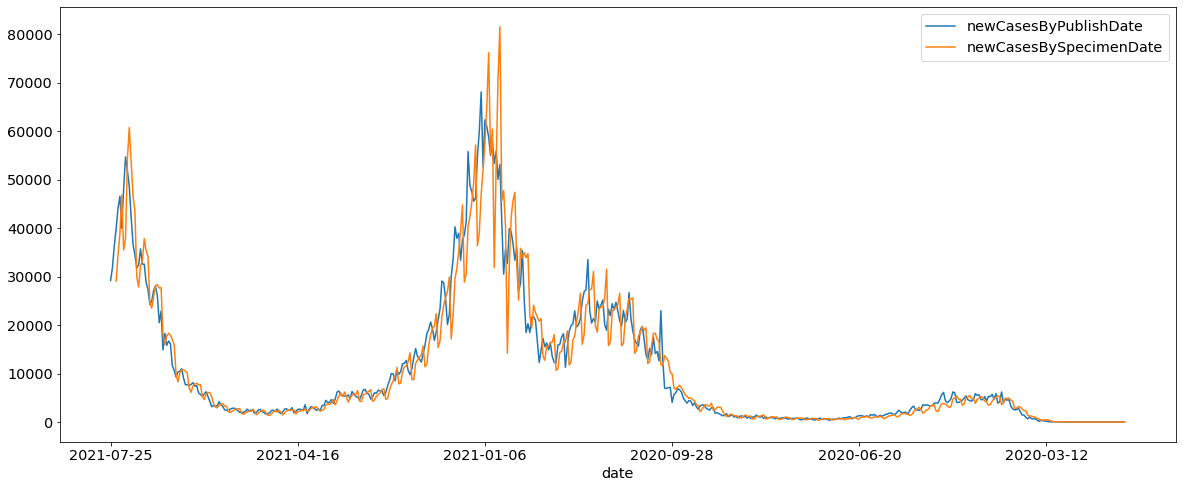

In [540]:
fig, ax = plt.subplots(1, 1)
    
data_df.plot(x='date', y='newCasesByPublishDate', ax=ax)
data_df.plot(x='date', y='newCasesBySpecimenDate', ax=ax)

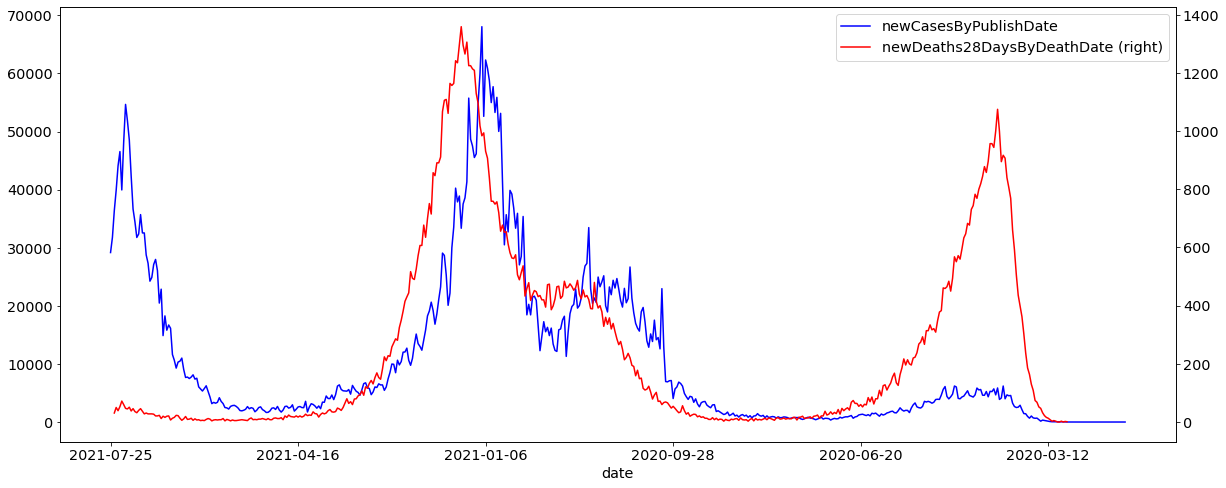

In [579]:
fig, ax = plt.subplots(1, 1)
    
plt1 = data_df.plot(x='date', y='newCasesByPublishDate', ax=ax, c='b')
plt2 = data_df.plot(x='date', y='newDeaths28DaysByDeathDate', ax=ax, c='r', secondary_y=True)


In [ ]:
ABOVE IMPLEMENTED IN PANDAS

Text(0.5, 1.0, 'Deaths (22 days previous) / Cases')

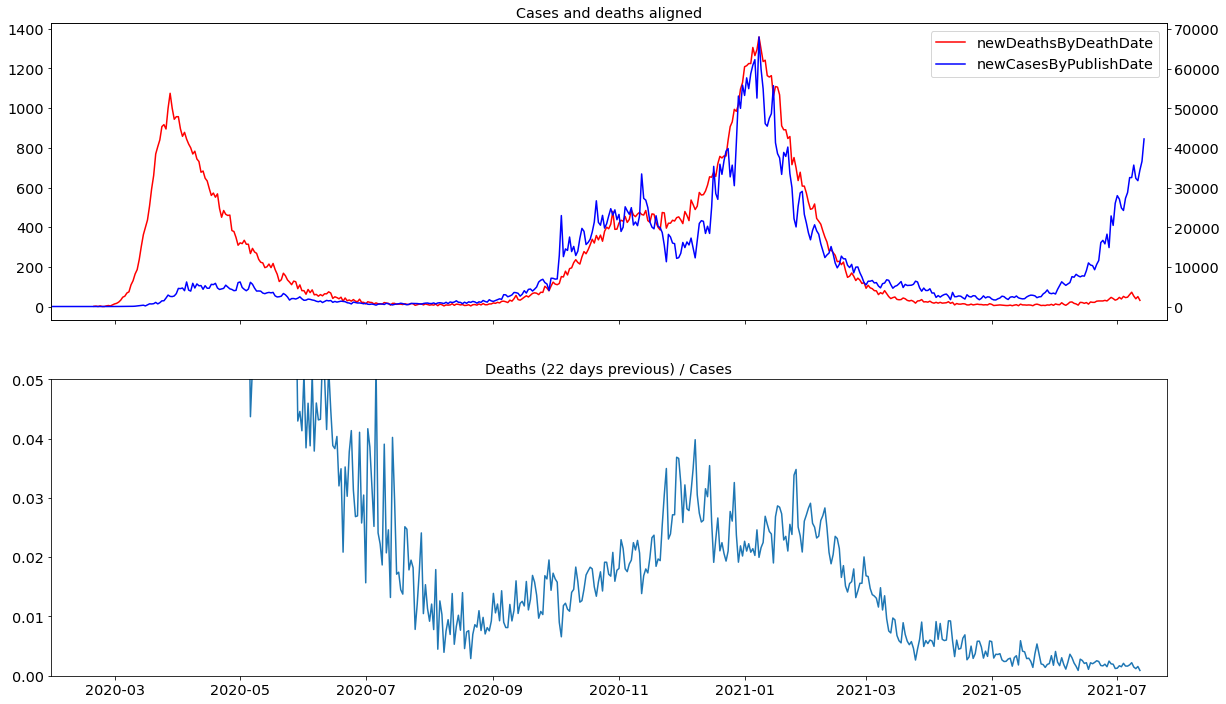

In [578]:
lag = 11

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(20, 12))

plt.xlim(np.min(dates), np.max(dates))

ax1b = ax1.twinx()

ax1b.set_title('Cases and deaths aligned')

plt1 = ax1.plot(dates[lag:], np.array(deathsDea)[:-lag], label = "newDeathsByDeathDate", c='r')
plt2 = ax1b.plot(dates[lag:], np.array(casesPub)[lag:], label = 'newCasesByPublishDate', c='b')

lns = plt1 + plt2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)


plt2 = ax2.plot(dates[lag:], np.array(deathsDea)[:-lag]/np.array(casesPub)[lag:])
ax2.set_ylim(0, 0.05)
ax2.set_title('Deaths ({0} days previous) / Cases'.format(int(lag*2)))